In [1]:
import os
from dataset import ShapesDataset
TRAIN_DATASET = "dataset"
dataset_train = ShapesDataset()
dataset_train.load_dataset(TRAIN_DATASET)
dataset_train.prepare()

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/s

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/a/yu-yamaoka/anaconda3/envs

  0%|          | 0/70 [00:00<?, ?it/s]

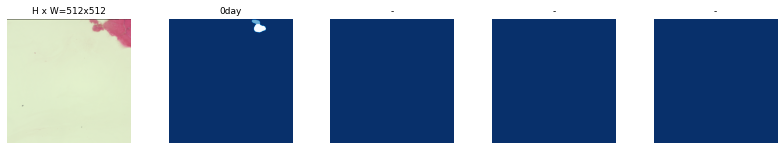

  1%|▏         | 1/70 [00:03<04:13,  3.67s/it]

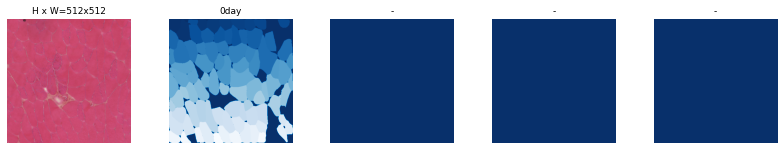

  3%|▎         | 2/70 [00:10<06:26,  5.69s/it]

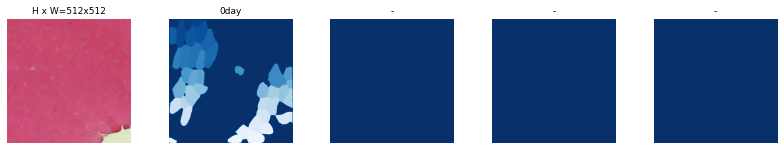

  4%|▍         | 3/70 [00:16<06:12,  5.56s/it]

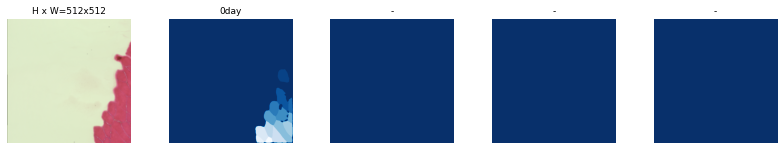

  6%|▌         | 4/70 [00:19<05:05,  4.63s/it]

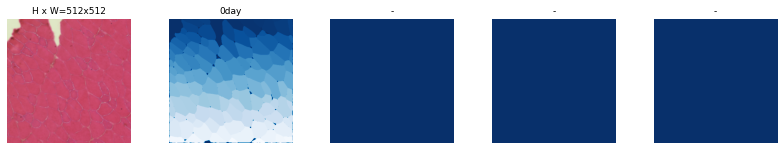

  7%|▋         | 5/70 [00:29<06:58,  6.44s/it]

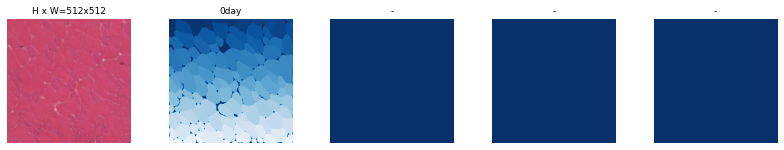

  9%|▊         | 6/70 [00:36<07:20,  6.89s/it]

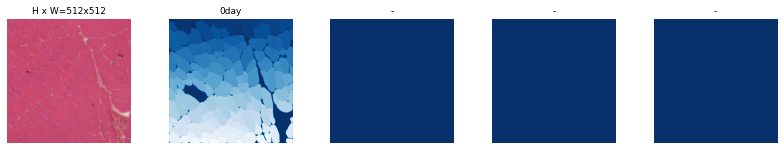

 10%|█         | 7/70 [00:44<07:33,  7.21s/it]

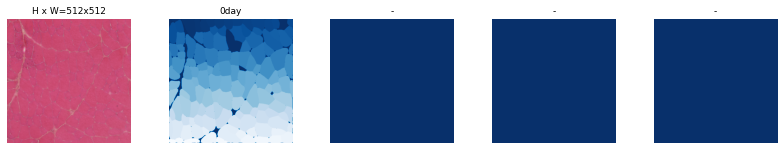

 11%|█▏        | 8/70 [00:51<07:20,  7.11s/it]

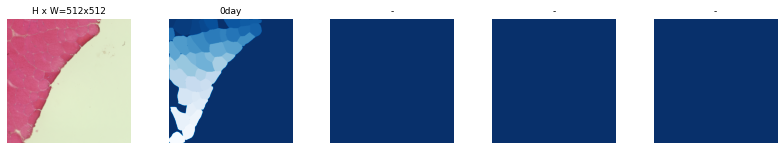

 13%|█▎        | 9/70 [00:55<06:21,  6.25s/it]

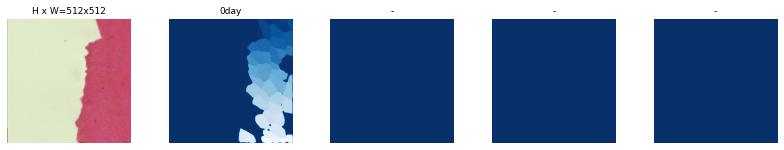

 14%|█▍        | 10/70 [01:00<05:42,  5.72s/it]

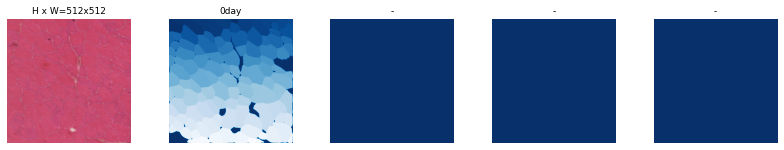

 16%|█▌        | 11/70 [01:08<06:18,  6.42s/it]

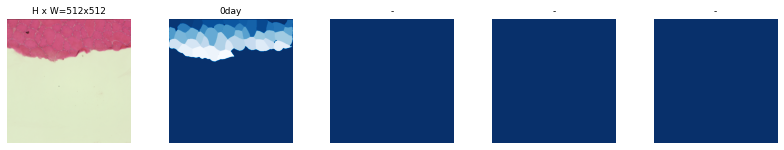

 17%|█▋        | 12/70 [01:12<05:33,  5.76s/it]

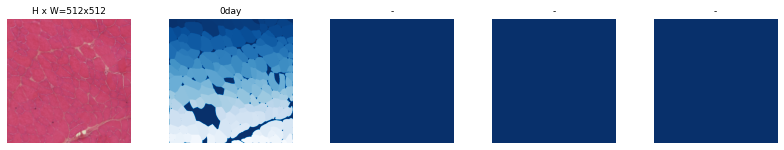

 19%|█▊        | 13/70 [01:21<06:14,  6.57s/it]

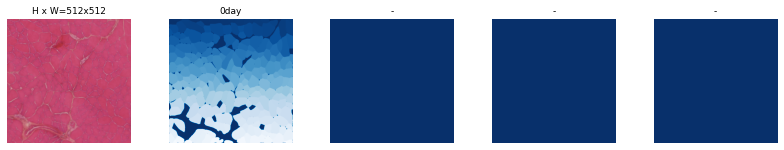

 20%|██        | 14/70 [01:30<06:48,  7.29s/it]

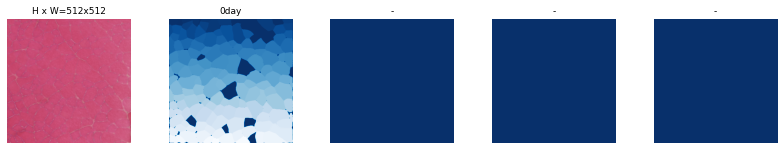

 21%|██▏       | 15/70 [01:38<06:59,  7.63s/it]

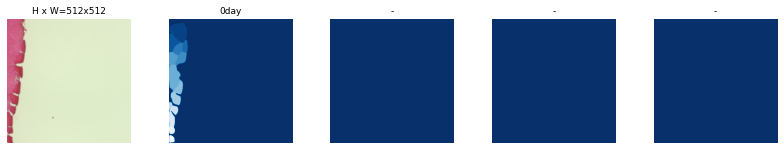

 23%|██▎       | 16/70 [01:42<05:53,  6.55s/it]

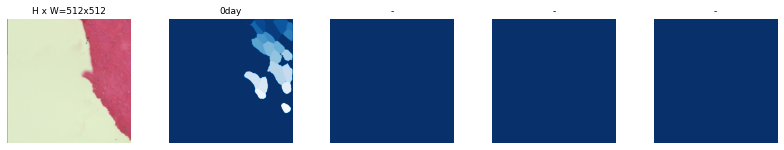

 24%|██▍       | 17/70 [01:46<05:09,  5.85s/it]

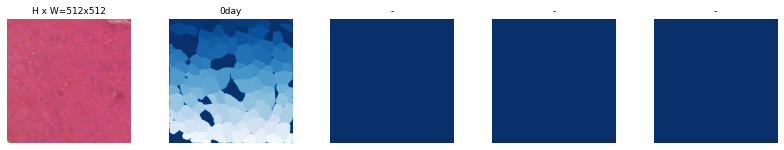

 26%|██▌       | 18/70 [01:54<05:29,  6.33s/it]

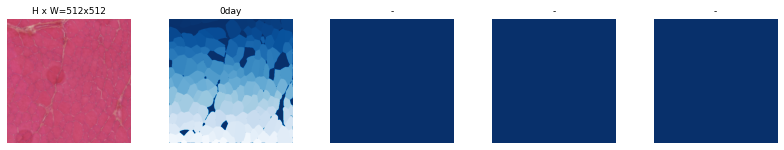

 27%|██▋       | 19/70 [02:02<05:56,  7.00s/it]

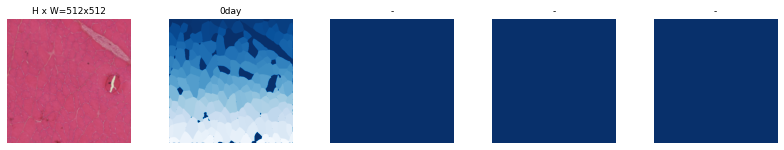

 29%|██▊       | 20/70 [02:11<06:14,  7.49s/it]

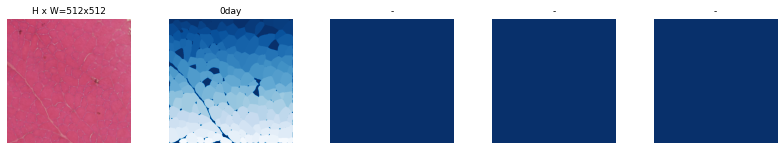

 30%|███       | 21/70 [02:20<06:30,  7.98s/it]

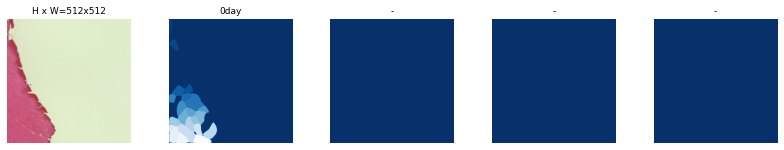

 31%|███▏      | 22/70 [02:24<05:29,  6.86s/it]

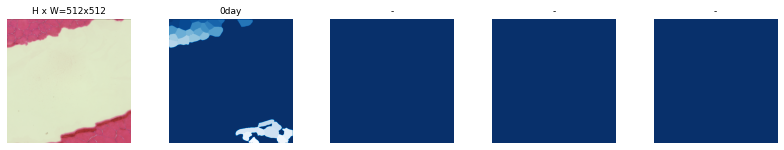

 33%|███▎      | 23/70 [02:28<04:42,  6.01s/it]

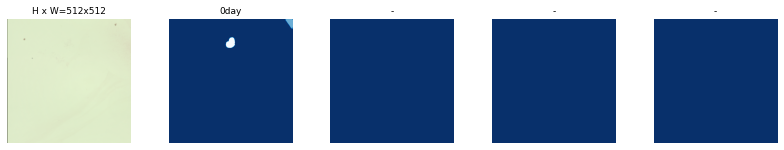

 34%|███▍      | 24/70 [02:32<04:07,  5.38s/it]

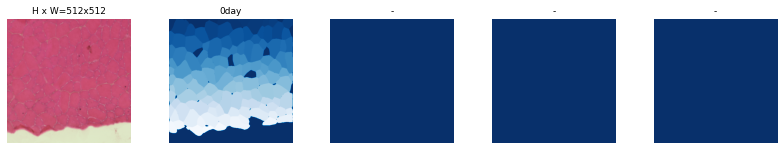

 36%|███▌      | 25/70 [02:40<04:34,  6.10s/it]

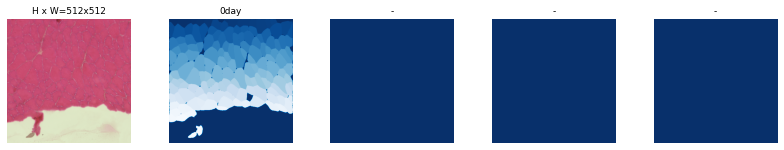

 37%|███▋      | 26/70 [02:47<04:37,  6.31s/it]

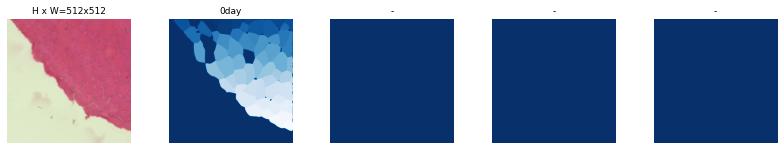

 39%|███▊      | 27/70 [02:52<04:21,  6.09s/it]

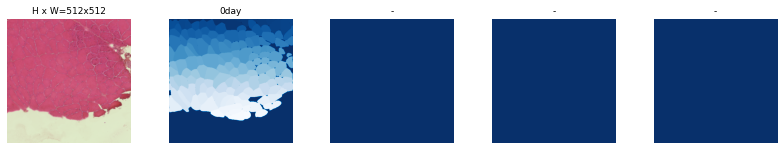

 40%|████      | 28/70 [02:59<04:25,  6.32s/it]

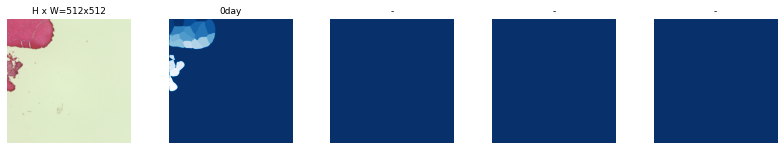

 41%|████▏     | 29/70 [03:03<03:53,  5.70s/it]

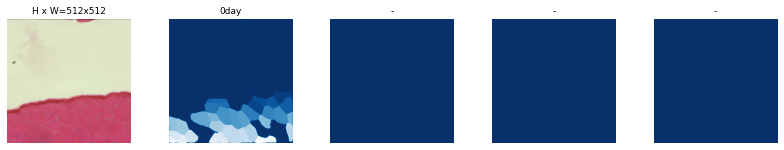

 43%|████▎     | 30/70 [03:08<03:28,  5.22s/it]

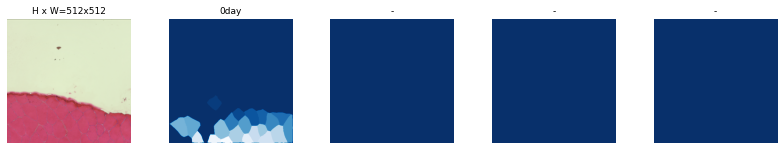

 44%|████▍     | 31/70 [03:12<03:18,  5.10s/it]/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


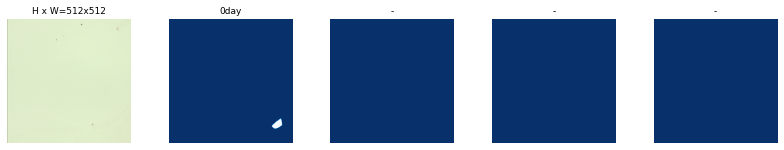

 46%|████▌     | 32/70 [03:17<03:03,  4.83s/it]

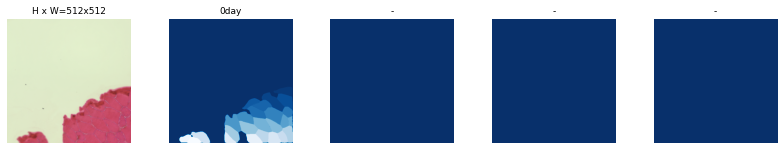

 47%|████▋     | 33/70 [03:21<02:53,  4.68s/it]

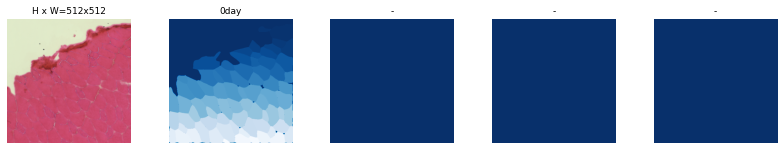

 49%|████▊     | 34/70 [03:27<03:03,  5.08s/it]

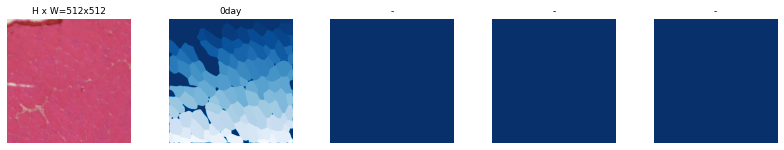

 50%|█████     | 35/70 [03:35<03:30,  6.00s/it]

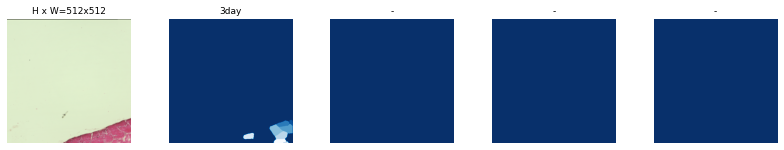

 51%|█████▏    | 36/70 [03:39<03:00,  5.32s/it]

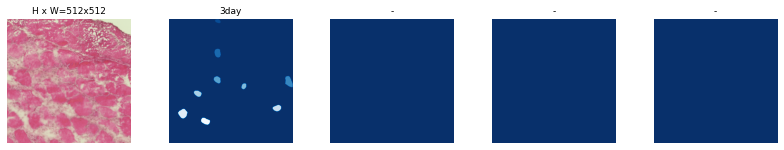

 53%|█████▎    | 37/70 [03:43<02:39,  4.83s/it]

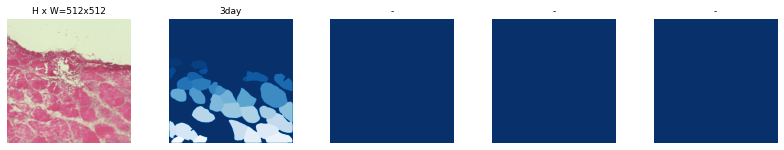

 54%|█████▍    | 38/70 [03:48<02:37,  4.93s/it]

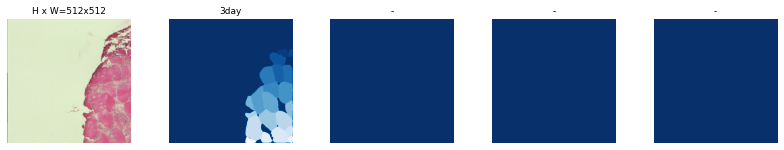

 56%|█████▌    | 39/70 [03:52<02:28,  4.80s/it]

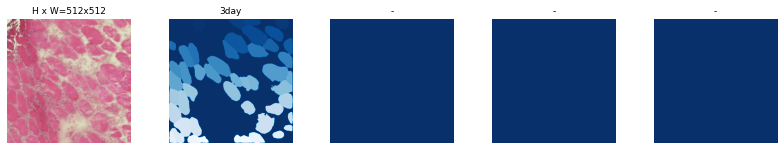

 57%|█████▋    | 40/70 [03:58<02:30,  5.02s/it]

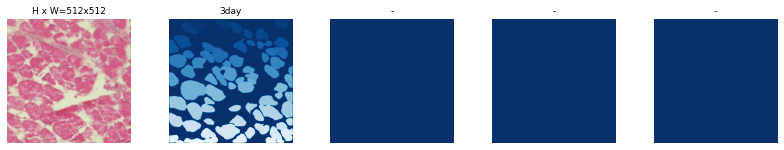

 59%|█████▊    | 41/70 [04:03<02:29,  5.16s/it]

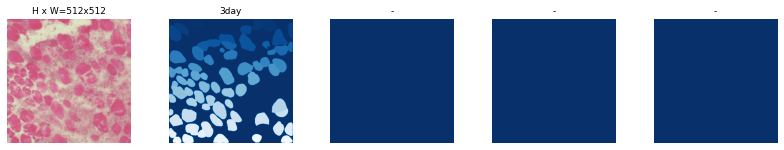

 60%|██████    | 42/70 [04:08<02:21,  5.06s/it]

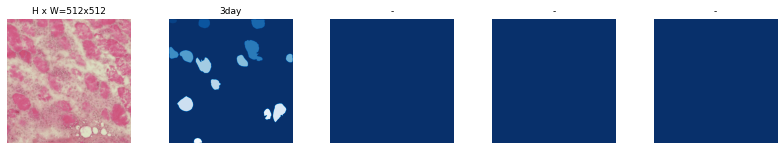

 61%|██████▏   | 43/70 [04:12<02:10,  4.85s/it]

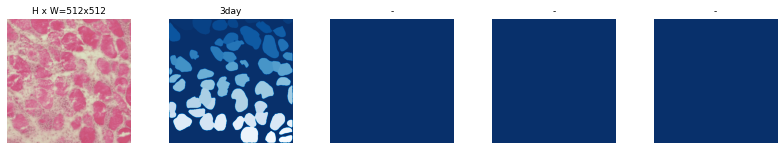

 63%|██████▎   | 44/70 [04:18<02:09,  4.98s/it]

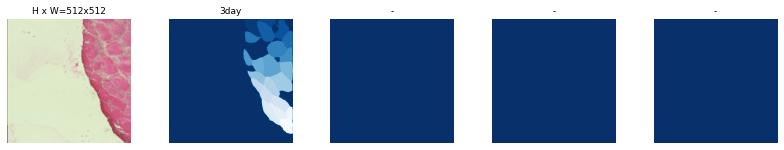

 64%|██████▍   | 45/70 [04:22<01:59,  4.76s/it]

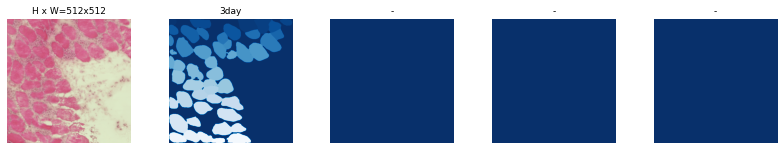

 66%|██████▌   | 46/70 [04:27<01:54,  4.76s/it]

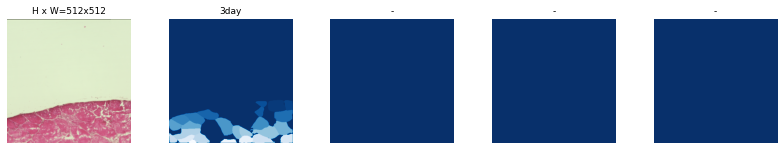

 67%|██████▋   | 47/70 [04:31<01:47,  4.67s/it]

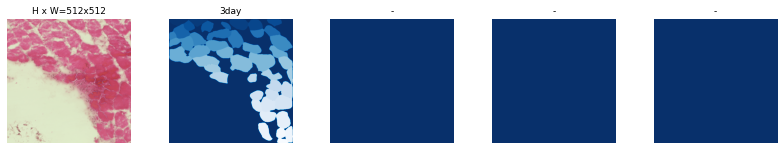

 69%|██████▊   | 48/70 [04:36<01:44,  4.76s/it]

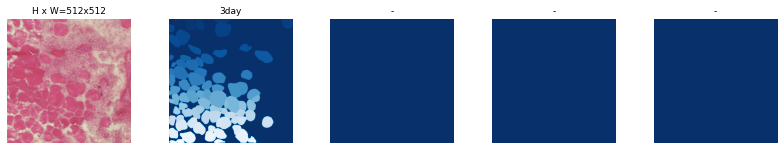

 70%|███████   | 49/70 [04:41<01:43,  4.91s/it]

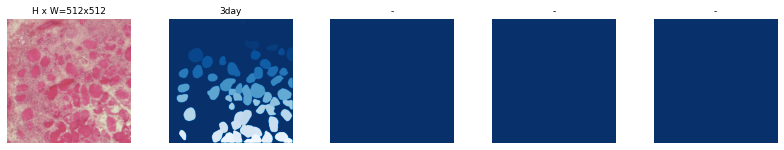

 71%|███████▏  | 50/70 [04:46<01:38,  4.95s/it]

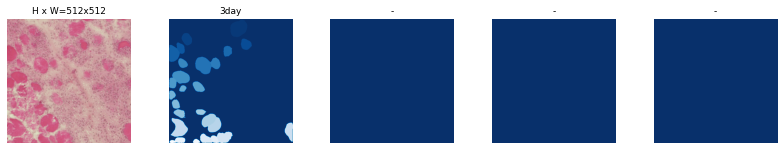

 73%|███████▎  | 51/70 [04:51<01:32,  4.88s/it]

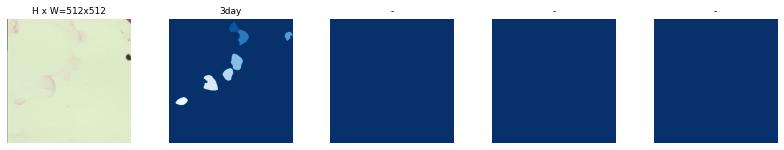

 74%|███████▍  | 52/70 [04:55<01:23,  4.66s/it]

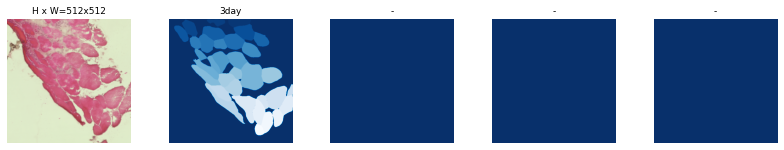

 76%|███████▌  | 53/70 [05:01<01:22,  4.85s/it]

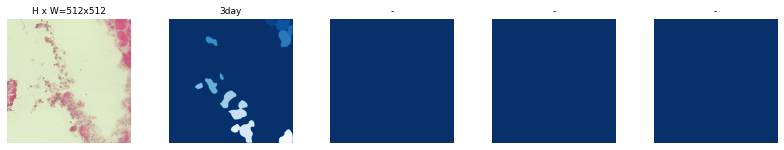

 77%|███████▋  | 54/70 [05:05<01:14,  4.66s/it]

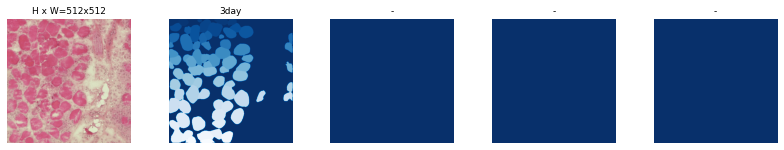

 79%|███████▊  | 55/70 [05:10<01:13,  4.88s/it]

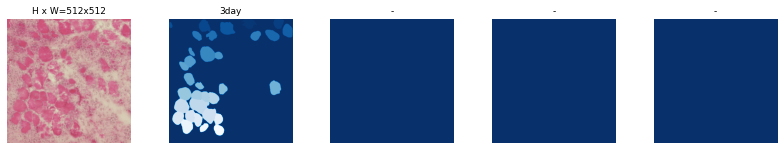

 80%|████████  | 56/70 [05:15<01:07,  4.82s/it]

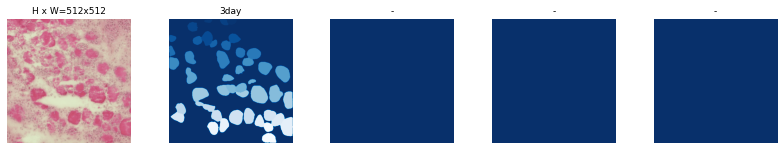

 81%|████████▏ | 57/70 [05:20<01:03,  4.87s/it]

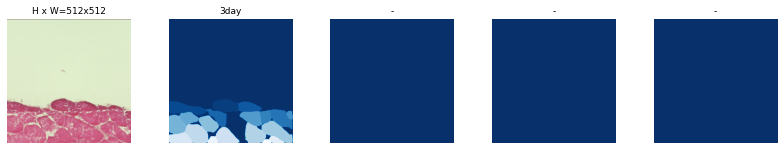

 83%|████████▎ | 58/70 [05:25<00:58,  4.91s/it]

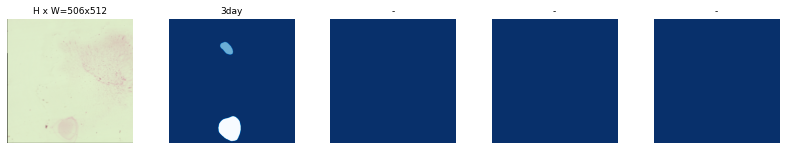

 84%|████████▍ | 59/70 [05:29<00:50,  4.59s/it]

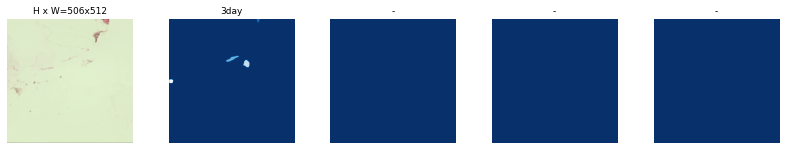

 86%|████████▌ | 60/70 [05:33<00:43,  4.36s/it]

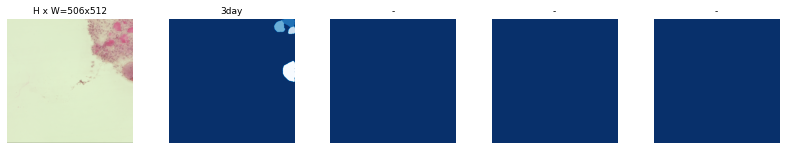

 87%|████████▋ | 61/70 [05:37<00:38,  4.31s/it]

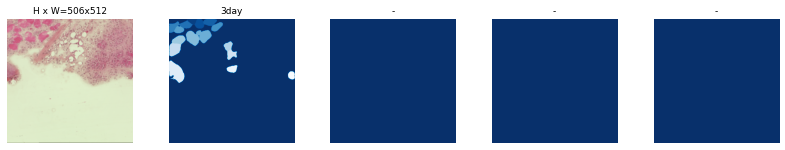

 89%|████████▊ | 62/70 [05:41<00:34,  4.34s/it]

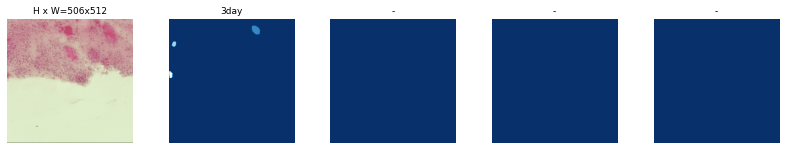

 90%|█████████ | 63/70 [05:45<00:28,  4.13s/it]

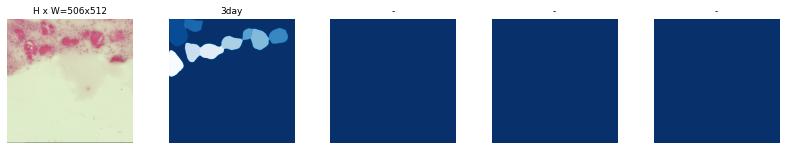

 91%|█████████▏| 64/70 [05:49<00:24,  4.05s/it]

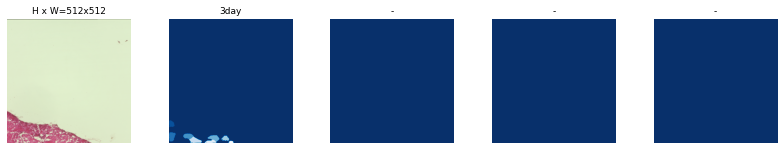

 96%|█████████▌| 67/70 [06:01<00:12,  4.10s/it]

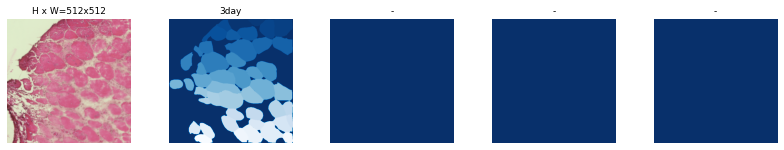

 97%|█████████▋| 68/70 [06:07<00:09,  4.60s/it]

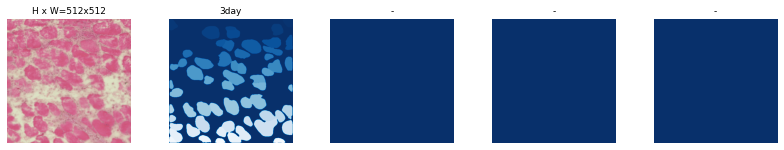

 99%|█████████▊| 69/70 [06:13<00:04,  4.97s/it]

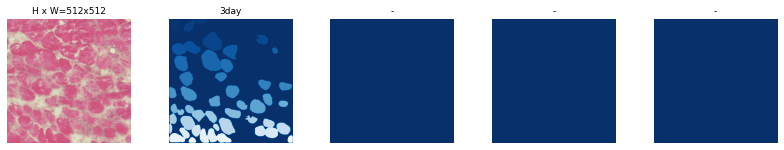

100%|██████████| 70/70 [06:18<00:00,  5.40s/it]

{'_image_ids': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69]),
 'class_from_source_map': {'.0': 0, 'cell_dataset.1': 1, 'cell_dataset.2': 2},
 'class_ids': array([0, 1, 2]),
 'class_info': [{'id': 0, 'name': 'BG', 'source': ''},
                {'id': 1, 'name': '0day', 'source': 'cell_dataset'},
                {'id': 2, 'name': '3day', 'source': 'cell_dataset'}],
 'class_names': ['BG', '0day', '3day'],
 'image_from_source_map': {'cell_dataset.1': 35,
                           'cell_dataset.10': 36,
                           'cell_dataset.11': 37,
                           'cell_dataset.12': 38,
                           'cell_dataset.13': 39,
                           'cell_dataset.14': 40,
                        

In [3]:
"""確認用、
取り込んだデータを画像として出力する。
CheckFlagが1ならば画像が表示される。    
"""
from mrcnn import visualize
from tqdm import tqdm
CheckFlag = 1
image_ids = dataset_train.image_ids
for TRAIN_DATASET in tqdm(image_ids):
    image = dataset_train.load_image(TRAIN_DATASET)
    mask, class_ids = dataset_train.load_mask(TRAIN_DATASET)
    if CheckFlag == 1 and class_ids is not None:
        visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)
        
"""確認用、
取り込んだ訓練データの配列構造が表示される。
CheckFlagが1ならば配列構造が表示される。    
"""
import pprint
if CheckFlag==1:
    pprint.pprint(vars(dataset_train))

In [ ]:
"""
ハイパーパラメータと学習前のモデルをインポートする。 
CheckFlagが1ならばハイパーパラメータが表示される。 
"""
from mrcnn.train_config import train_Config
import mrcnn.model as modellib  

config = train_Config()
if CheckFlag==1:
    config.display()

In [ ]:
"""モデルを読み込む
どの初期モデルを用いるか？
時間がかかるのと，タスクマネージャーで専用GPUが消費されていることを確認できる．

最初だとmask_rcnn_coco.h5をインストール．
"""
from mrcnn import utils

model = modellib.MaskRCNN(mode="training", config=config,
                              model_dir="logs/model")

COCO_MODEL_PATH = 'mask_rcnn_coco.h5'
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


In [ ]:
"""GPU>1のときに用いる．
VRAMのリミッター解除
GPU_COUNT=1のときはすべてコメントアウトしてかまわない．
ここのconfigは上のハイパーパラメータとは異なるのだが，名前だけ変えてもうまく動かない汗

Args:
    config:TensorFlowのConfigであることに注意！　名前変えたいが，変えると動かぬ（直します）
"""

import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
 
config = tf.ConfigProto()
config.allow_soft_placement=True
session = tf.Session(config=config)
KTF.set_session(session)

In [ ]:
"""モデルの重みを読み込んでいるものと思われる．時間がかかる．
mask_rcnn_coco.h5学習時は  exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"]を用いる
heads,3+などを学習したあとはexcludeなしのload_weightを用いる．

"""
print(COCO_MODEL_PATH)
model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                                "mrcnn_bbox", "mrcnn_mask"])


#model.load_weights(COCO_MODEL_PATH, by_name=True)

mask_rcnn_coco.h5


In [ ]:
"""モデルの訓練を行う．本学習．時間とGPUが消費される．
Args:
    learning_rate : 学習速度
    
    epochs : エポック数
    
    layers : heads, 3+, 4+, 5+, all

"""
model.train(dataset_train, dataset_train,
                learning_rate=0.01,
                epochs=1,
                layers='heads')


Starting at epoch 0. LR=0.01

Checkpoint Path: logs/model/cell_dataset20220428T0912/mask_rcnn_cell_dataset_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4 

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/keras/engine/training_generat



Epoch 1/1
dataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.png


dataset/0day/34.pngdataset/0day/34.png

dataset/0day/34.png
dataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.png


dataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.png

dataset/0day/34.png


dataset/0day/34.png

dataset/0day/34.png




dataset/0day/34.png

dataset/0day/34.pngdataset/0day/34.png
dataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.png
dataset/0day/34.pngdataset/0day/34.png
dataset/0day/34.pngdataset/0day/34.png
dataset/0day/34.png

dataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.png
dataset/0day/34.png
dataset/0day/34.pngdataset/0day/34.pngdataset/0day/34.png





dataset/0day/34.png





dataset/0day/34.png

dataset/0day/34.png
dataset/0day/34.png
dataset/0day/34.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0

ValueError: Error when checking input: expected input_image_meta to have shape (19,) but got array with shape (15,)

[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
dataset/0day/17.png
dataset/0day/17.png
[1 1 1 1 1 1 1]
dataset/0day/17.png
[1 1 1 1 1 1 1]
dataset/0day/17.png
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]dataset/0day/17.png

dataset/0day/17.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[1 1 1 1 1 1 1]
dataset/0day/17.png
[1 1 1 1 1 1 1][1 1 1 1 1 1 1]
dataset/0day/17.png

[1 1 1 1 1 1 1]
dataset/0day/17.png[1 1 1 1 1 1 1]

[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
dataset/0day/17.png
[1 1 1 1 1 1 1]
dataset/0day/17.png
[1 1 1 1 1 1 1]
dataset/0day/11.pngdataset/0day/17.png

[1 1 1 1 1 1 1]
dataset/0day/17.png
dataset/0day/17.png
dataset/0day/17.png
dataset/0day/17.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[1 1 1 1 1 1 1]
dataset/0day/17.png
dataset/0day/17.pngdataset/0day/17.png

dataset/0day/11.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/0day/6.png
dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0][0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
dataset/0day/6.png
dataset/0day/6.png
dataset/0day/6.png
dataset/0day/6.png
dataset/0day/6.png
dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0][0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]

dataset/0day/6.png

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/0day/6.png
dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png
[0]
dataset/3day/16.png
dataset/0day/6.png
dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]dataset/0day/6.png



/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


dataset/0day/6.png

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0][0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
dataset/0day/6.pngdataset/0day/6.png

dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/0day/6.png
dataset/0day/6.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]dataset/0day/6.png



/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
dataset/0day/6.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
dataset/0day/6.png
dataset/3day/16.png
[0]
[0]
dataset/3day/16.png
dataset/0day/6.png
[0]
dataset/0day/6.png
dataset/0day/6.png
dataset/3day/16.png
dataset/3day/16.png
dataset/0day/6.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

[0]
dataset/3day/16.png
[0]
[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png
dataset/3day/16.png
[0][0]

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)




dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0][0]

dataset/3day/16.png
dataset/3day/16.png
[0]
dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

[0][0]



/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png
dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png
[0]
[0]
dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]
dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]
dataset/3day/16.png
[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]
dataset/3day/16.png
[0]
dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]
dataset/3day/16.png
[0]
dataset/3day/16.png

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png
dataset/3day/16.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


[0]

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



dataset/3day/16.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


dataset/3day/16.png

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png
dataset/0day/19.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/0day/19.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png
[0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/16.png


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


[0]

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



dataset/0day/19.png
dataset/3day/16.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0]
dataset/3day/16.png
[0]
dataset/0day/19.png
dataset/3day/16.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0]
dataset/3day/16.png
[0]
dataset/3day/16.png
dataset/0day/19.png
[0]
[0][0]

dataset/3day/16.png
dataset/3day/16.png
dataset/3day/16.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
dataset/0day/19.png
[0]
[0]dataset/3day/16.png

dataset/3day/16.png
[0]
[0]
[0]
dataset/0day/19.png
dataset/3day/16.png
dataset/3day/16.png
dataset/3day/16.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
dataset/0day/19.png
[0]dataset/0day/19.png

dataset/3day/16.png
dataset/0day/19.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0]
dataset/3day/16.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
dataset/0day/19.png
dataset/0day/19.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
dataset/0day/19.png
dataset/0day/19.png
dataset/0day/19.png
[1 1 1 1 1 1 1 1 1 1 1 

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset/3day/30.png
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[1 1]
dataset/3day/30.png
dataset/3day/30.png
dataset/3day/30.png
[1 1]
[1 1]
[1 1]
dataset/3day/30.png
[1 1]
dataset/3day/30.png
dataset/3day/30.pngdataset/3day/30.png

dataset/3day/30.png
[1 1]
None


ERROR:root:Error processing image {'id': '0', 'source': 'cell_dataset', 'path': PosixPath('dataset/3day/0.png'), 'mask_path': PosixPath('dataset/3day/0.png'), 'width': 512, 'height': 512}
Traceback (most recent call last):
  File "/a/yu-yamaoka/cellpose-MaskRCNN/mrcnn/model.py", line 1712, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/a/yu-yamaoka/cellpose-MaskRCNN/mrcnn/model.py", line 1223, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding, crop)
  File "/a/yu-yamaoka/cellpose-MaskRCNN/mrcnn/utils.py", line 508, in resize_mask
    mask = scipy.ndimage.zoom(mask, zoom=[scale, scale, 1], order=0)
  File "/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/scipy/ndimage/interpolation.py", line 766, in zoom
    raise RuntimeError('input and output rank must be > 0')
RuntimeError: input and output rank must be > 0


dataset/3day/32.png
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1 1]
